# NOISE TEST

### Brian2 stochastic noise

Here we will test the efficacy of using `xi` vs using `1/sqrt(dt) * randn()` for evaluating differantial equations.

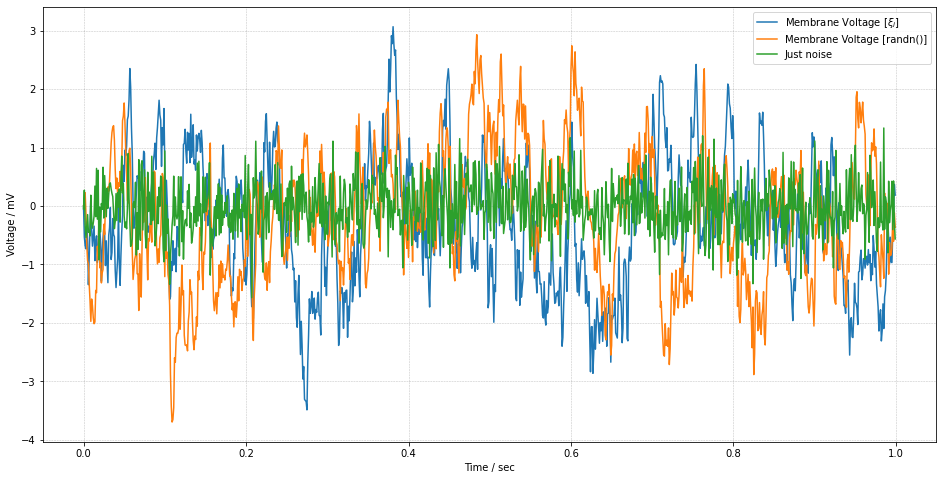

In [11]:
# Start by importing brian2
from brian2 import *

# And defining our equations
eqs_xi = '''
    dv/dt = -v/tau + sigma*sqrt(2/tau)*xi : volt
'''

eqs_rnd = '''
    dv/dt = -v/tau + noise : volt
    noise = sigma*sqrt(2/tau)*randn()/sqrt(tstep) : volt/second (constant over dt)
    tstep : second
'''

# And our variables
tau = 10*ms
sigma = 1*mV
dt_sim = 1*ms
defaultclock.dt = dt_sim

# Define our groups
G_xi = NeuronGroup(10, eqs_xi, method='heun')
G_rnd = NeuronGroup(10, eqs_rnd, method='euler')
G_rnd.tstep = defaultclock.dt

# Add state monitors to see the voltage
mon1 = StateMonitor(G_xi, 'v', record=True)
mon2 = StateMonitor(G_rnd, ['v', 'noise'], record=True)

# Make a network
net = Network()
net.add(G_xi)
net.add(G_rnd)
net.add(mon1)
net.add(mon2)

# Run a simulation
net.run(1*second)

# Plotting results
fig = figure(figsize=(16,8))
plt.plot(mon1.t/second, mon1.v[0]/mV, label=r"Membrane Voltage [$\xi_i$]")
plt.plot(mon2.t/second, mon2.v[0]/mV, label=r"Membrane Voltage [randn()]")
plt.plot(mon2.t/second, mon2.noise[0], label=r"Just noise")
plt.xlabel('Time / sec')
plt.ylabel('Voltage / mV')
plt.legend(loc=0)
plt.grid(color='black', linestyle='--', linewidth=0.5, alpha=0.25, zorder=-10.)
# plt.xlim([0, 0.5])

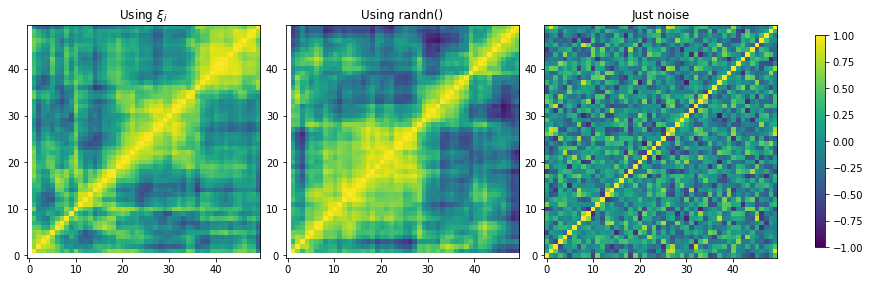

In [34]:
# Test temporal correlation using Pearson's correlation coefficients
fig, axs = plt.subplots(1,3, figsize=(12,5), constrained_layout=True)

imcorr_xi = axs[0].imshow(corrcoef((mon1.v[:,:50]/mV).T), origin='lower', vmin=-1, vmax=1)
imcorr_rnd = axs[1].imshow(corrcoef((mon2.v[:,:50]/mV).T), origin='lower', vmin=-1, vmax=1)
imcorr_xi = axs[2].imshow(corrcoef((mon2.noise[:,:50]/mV).T), origin='lower', vmin=-1, vmax=1)

axs[0].set_title(r'Using $\xi_{i}$')
axs[1].set_title(r'Using randn()')
axs[2].set_title(r'Just noise')

# plt.colorbar(imcorr_xi, ax=axs[0])
plt.colorbar(imcorr_rnd, ax=axs, shrink=0.6, location='right')

plt.show()

In [27]:
bins[0:-1] + (bins[1]-bins[0])

array([-1277.70765381,  -987.41162718,  -697.11560054,  -406.8195739 ,
        -116.52354726,   173.77247938,   464.06850602,   754.36453266,
        1044.6605593 ,  1334.95658594])

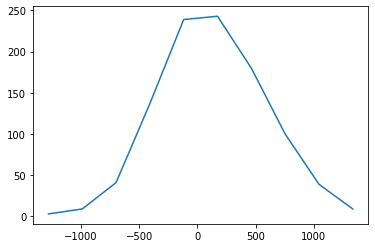

In [32]:
counts, bins = histogram(mon2.noise[0]/mV)
plt.plot(bins[0:-1] + (bins[1]-bins[0]), counts)

In [3]:
# Note: The noise term for a Hodgkin-Huxley neuron in the equations can be added as shown here
# https://brian.discourse.group/t/how-to-add-stochastic-equations-with-exponential-euler/259/2
eqs_noise = '''
noise = sigma*(2*gl/Cm)**.5*randn()/sqrt(dt) : volt/second (constant over dt)
'''